- Background and Context

- All Life Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. 
- The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this 
- base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, 
- the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

- A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department 
- to devise campaigns with better target marketing to increase the success ratio.

- You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers
- who have a higher probability of purchasing the loan.

- Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

## Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
#%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from utils import histogram_boxplot, labeled_barplot
from imblearn.over_sampling import ADASYN,SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import(precision_recall_curve,
                           recall_score, roc_auc_score,
                           confusion_matrix, roc_curve,
                           ConfusionMatrixDisplay)

## Load Data

In [3]:
# Read the data 

data =pd.read_csv("Loan_Modelling.csv")

In [4]:
# Explore the data type of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- From the above, it is obvious the data has no null values across the features and the target variable is personal_Loan
- It is also observed that most of the variables are of int data type except one which is float

In [5]:
#Looking into the first 5 records of the dataset

data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Copy the data into another variable for reuasbility
df = data.copy()

In [7]:
df.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- From the above decription of the data,i observed that most of the data have min of 0

In [8]:
#Checking if there are duplicated records in the dataset

df.duplicated().sum()

0

- Above shows there are no duplicated values in the data

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIPCode'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal_Loan'}>,
        <AxesSubplot:title={'center':'Securities_Account'}>,
        <AxesSubplot:title={'center':'CD_Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

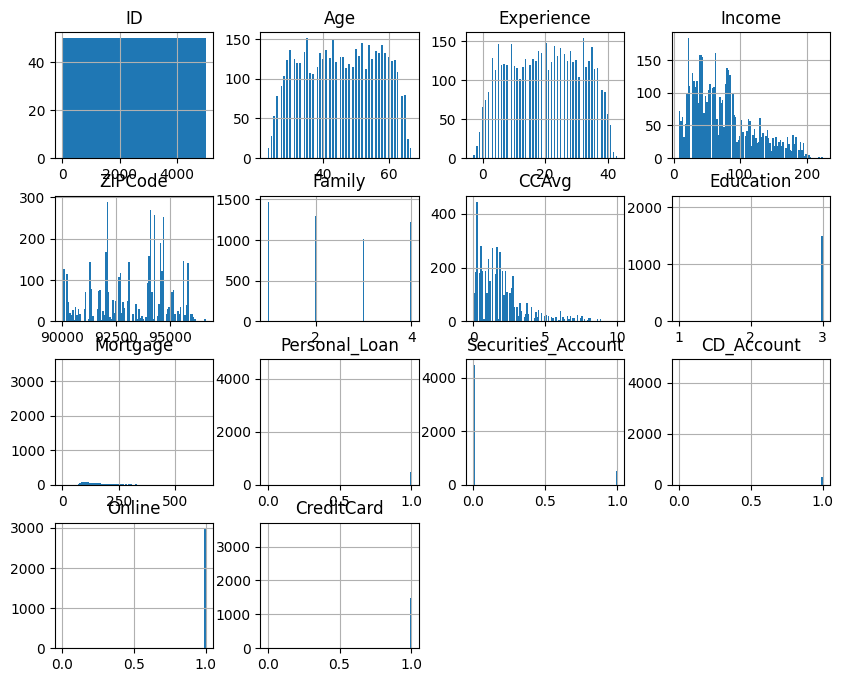

In [9]:
df.hist(stacked = False, bins = 100, figsize =(10,8))

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIPCode'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal_Loan'}>,
        <AxesSubplot:title={'center':'Securities_Account'}>,
        <AxesSubplot:title={'center':'CD_Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

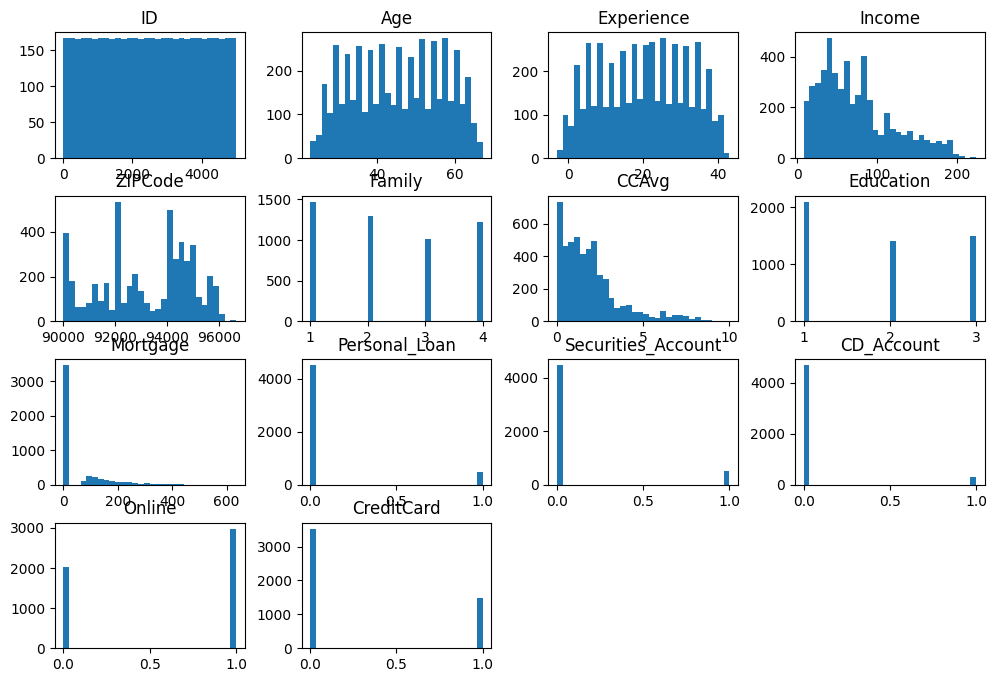

In [11]:
df.hist(grid=False, figsize =(12,8), bins =30)

- From above observation, CreditCrad have just 2 variable which is 0 and 1
- Same with Online, CD_Account,Securities Account and Personal Loan with personal loan having most of its rangewithin 0 while
- Education and famly features have their attributes grouped into3 and 4 groups respectively.

## Performing EDA of the Data

In [10]:
from utils import histogram_boxplot, labeled_barplot

## Univariate Analysis of the data

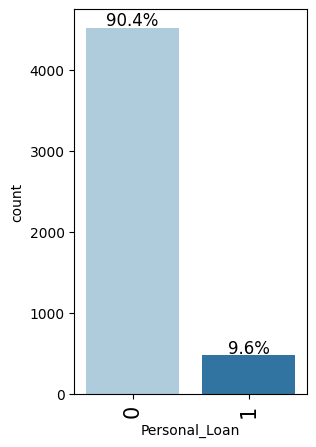

In [11]:
# check the distribution of the target  

labeled_barplot(df, "Personal_Loan", perc=True)

- Above figures shows that 90% of the customer base did not accept personal loan in the last campaign  while about 9.6% accepted the personal loan

<Figure size 3000x2000 with 0 Axes>

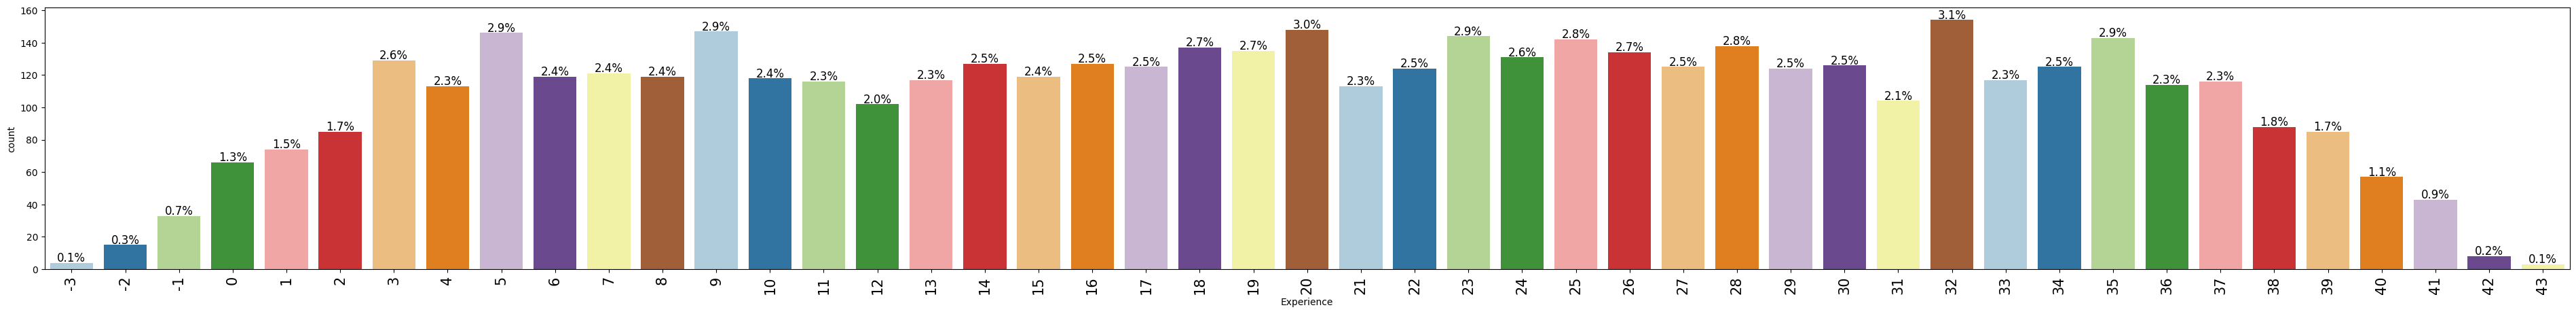

In [12]:
# The percentage of the years ofexperience of the customers
plt.figure(figsize =(30,20))
labeled_barplot(df, "Experience", perc=True)
plt.show()

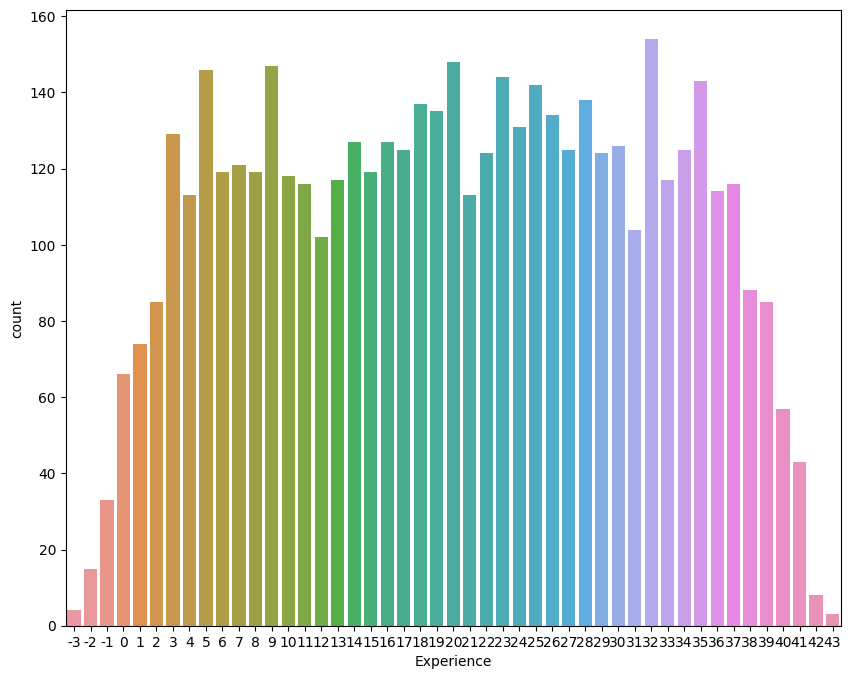

In [13]:
# The percentage of the years ofexperience of the customers

plt.figure(figsize =(10,8))
sns.countplot(x= 'Experience',data = df)
plt.show()

- From the above graph, i observed that years of experience have negative values.i think this might be outliers.
- This will be taken out later as experience minimum values should be 0 and not negative values

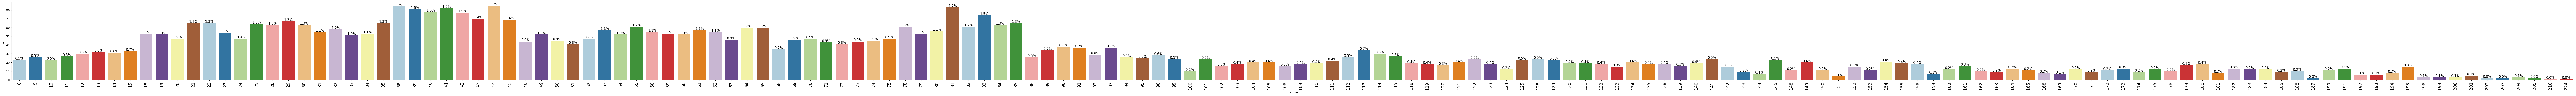

In [14]:
labeled_barplot(df, "Income", perc=True)

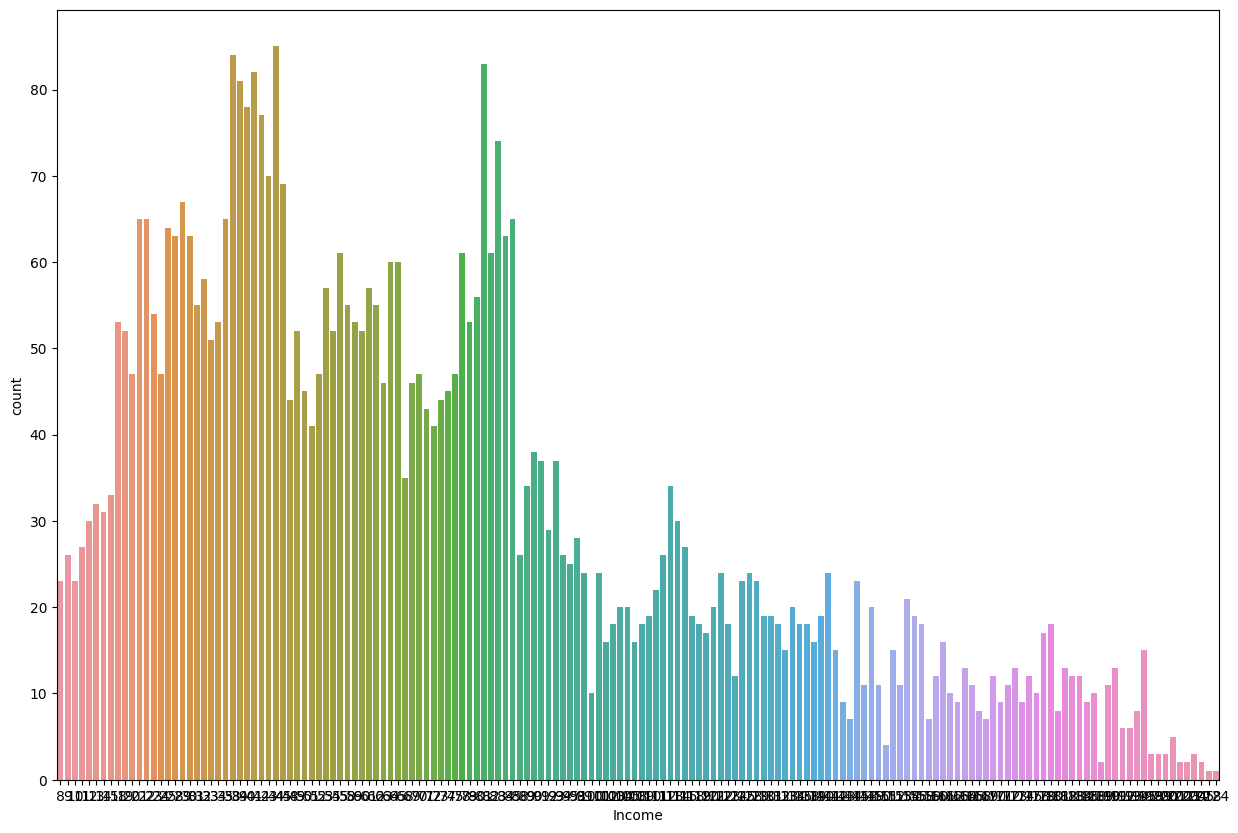

In [15]:
plt.figure(figsize =(15,10))
sns.countplot(x= 'Income',data = df)
plt.show()

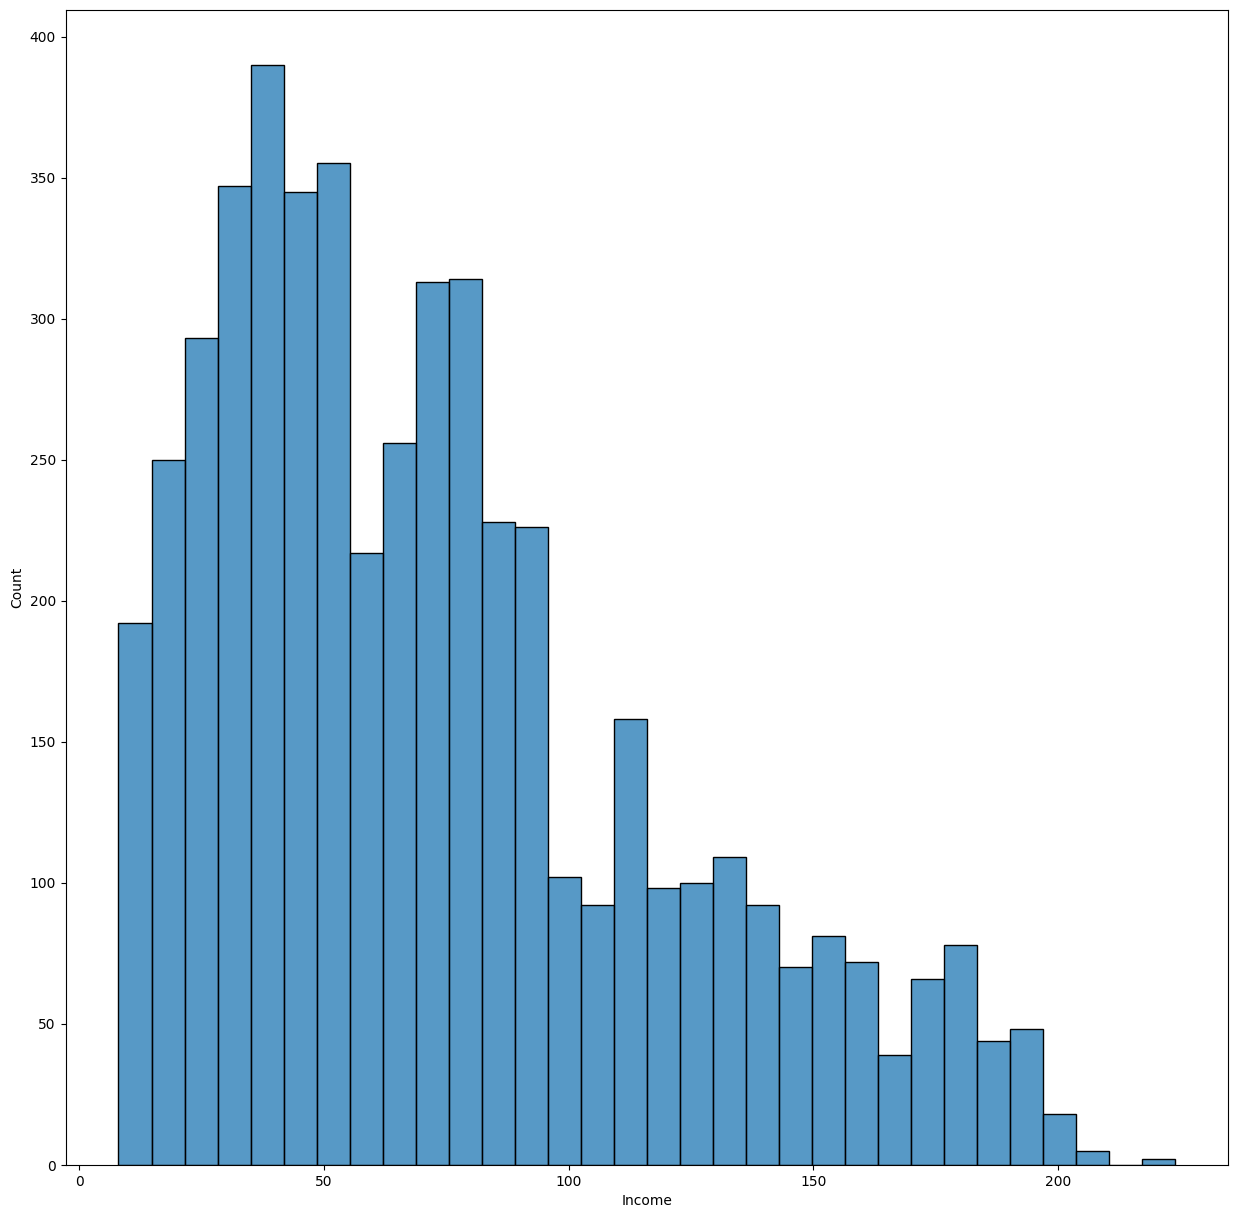

In [16]:
plt.figure(figsize =(15,15))
sns.histplot(x= 'Income',data = df)
plt.show()

- From the above graph, record shows that income range between 34,000 dollars to 80,000 Dollars have the highest record

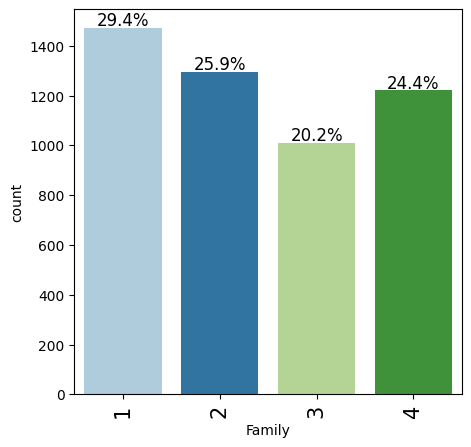

In [17]:
labeled_barplot(df, "Family", perc=True)

- From the univariate analysis of family, record with family size of 1 have the highest records while family whose size are 3 have the least record

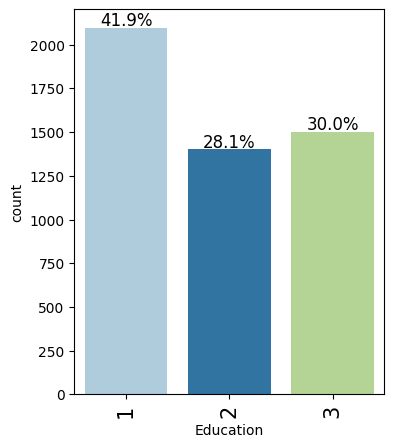

In [18]:
labeled_barplot(df, "Education", perc=True)

- From the above graph, undergrad have the highest population in the education classifcation of the dataset, folowed by professionals

- Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

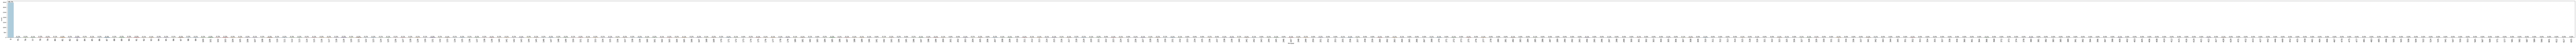

In [19]:
labeled_barplot(df, "Mortgage", perc=True)

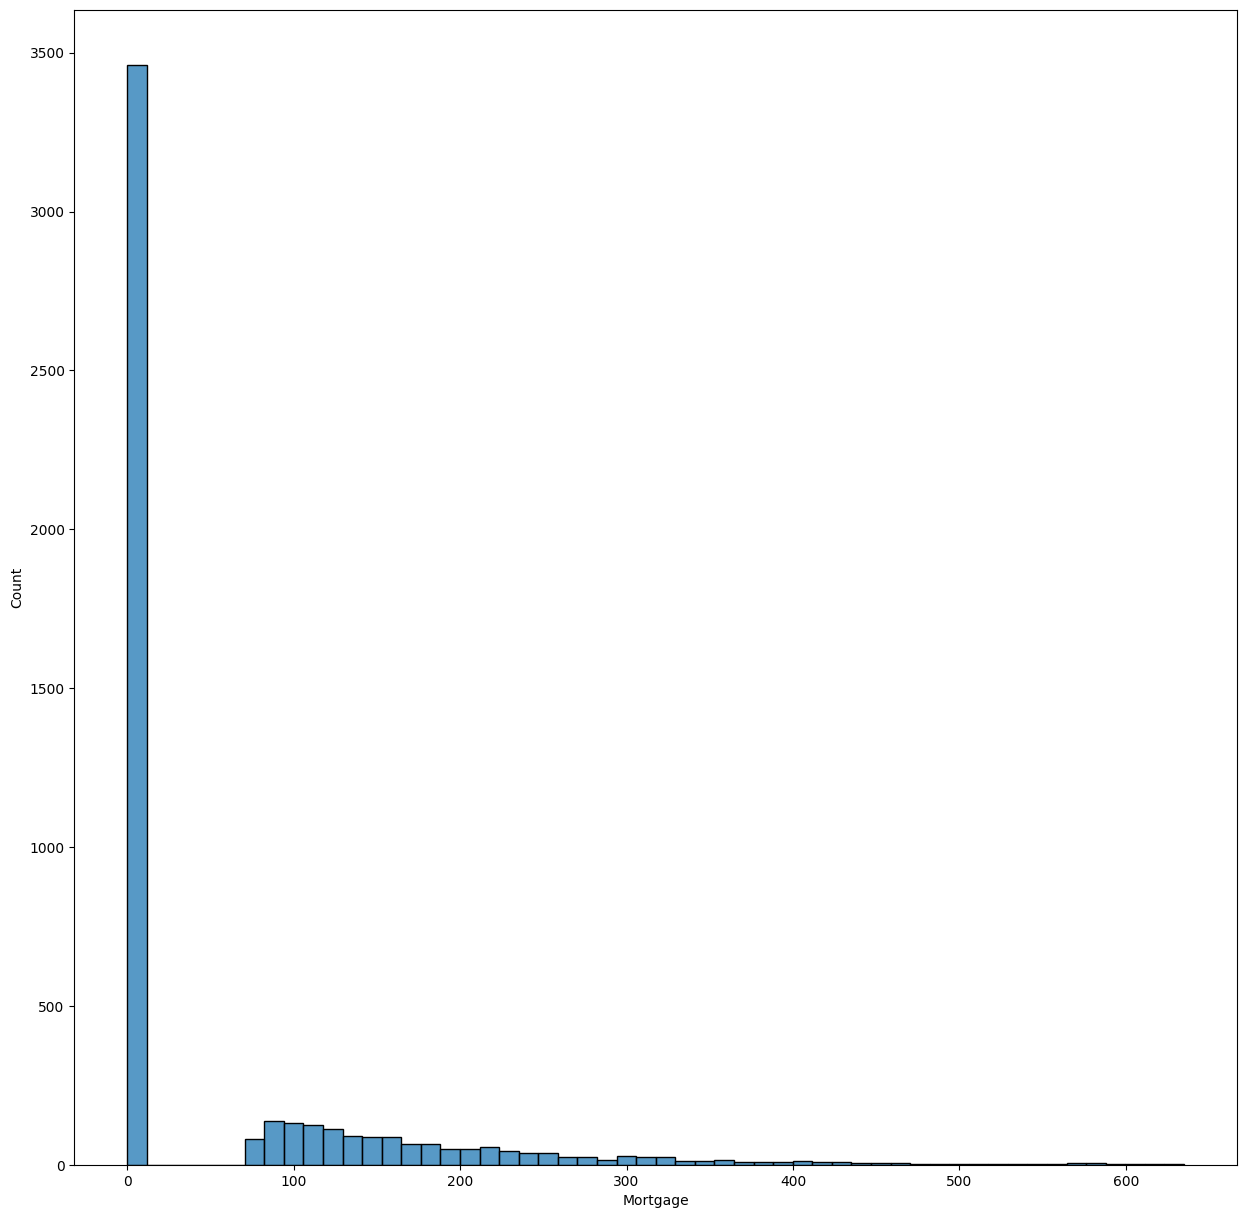

In [20]:
plt.figure(figsize =(15,15))
sns.histplot(x= 'Mortgage',data = df)
plt.show()

- Above visualization shows that Mortage( value of house mortgage if any) have majority of its record to be 0. Meaning most of the customer  do not have mortgage while about few number have value of it mortgage between 70 to 600
-Mortgage: Value of house mortgage if any.

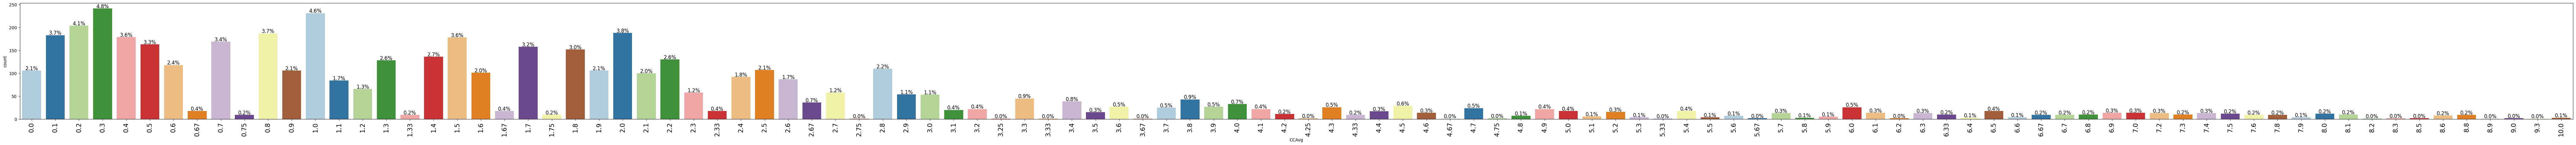

In [21]:
labeled_barplot(df, "CCAvg", perc=True)

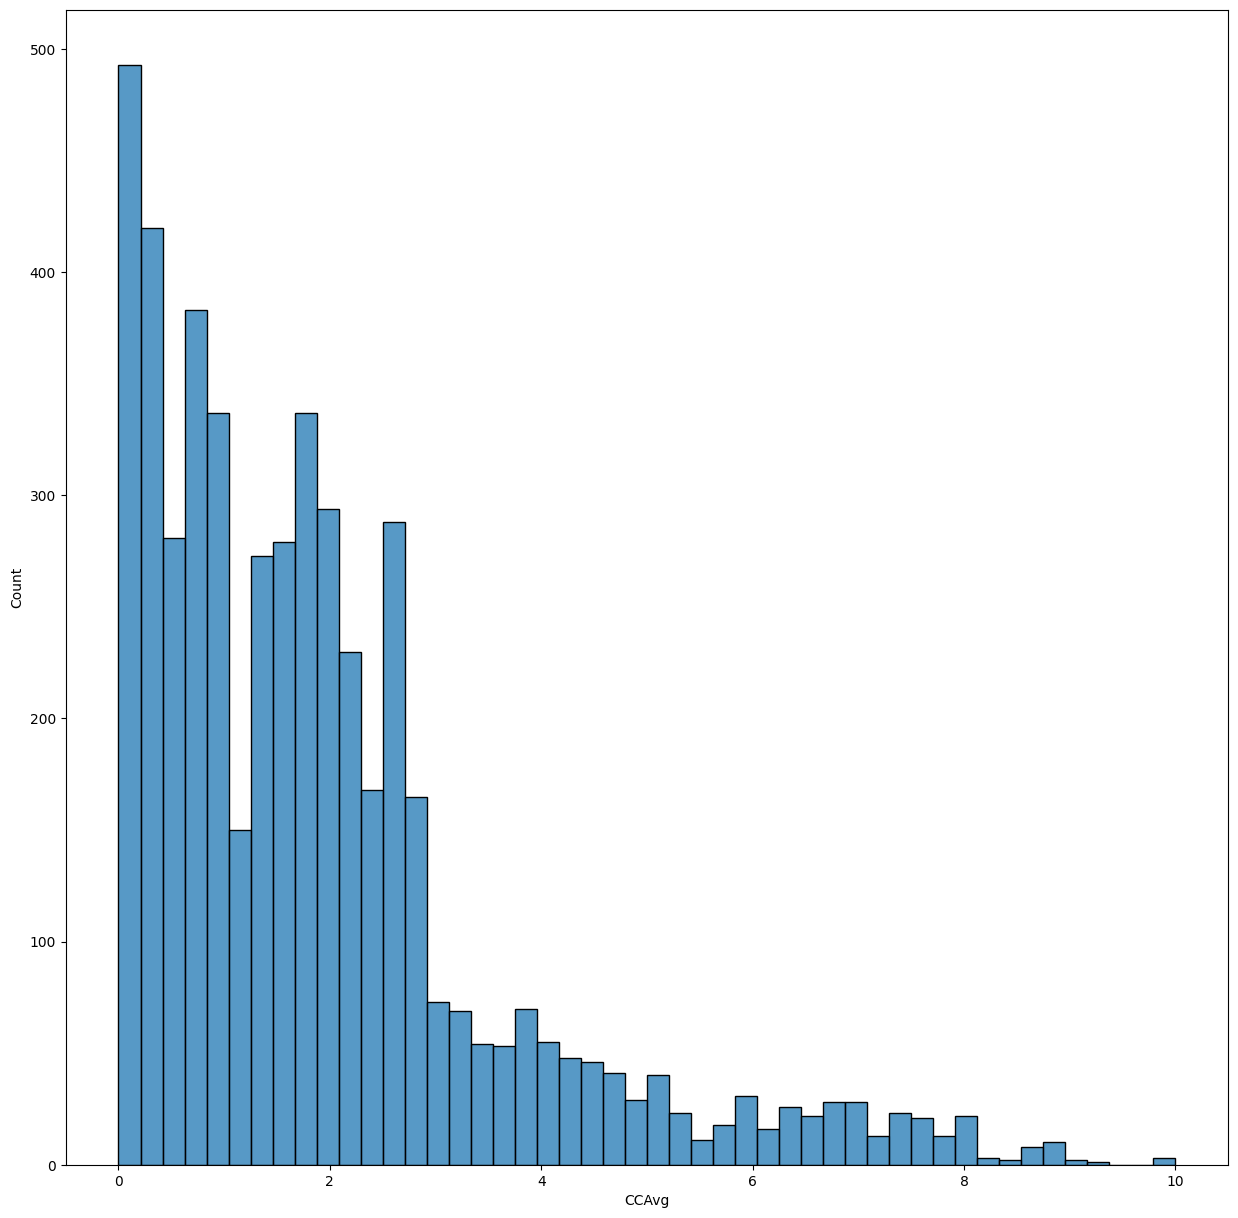

In [22]:
# CCAvg: Average spending on credit cards per month (in thousand dollars)

plt.figure(figsize =(15,15))
sns.histplot(x= 'CCAvg',data = df)
plt.show()

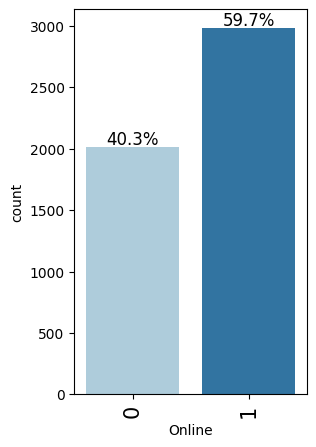

In [23]:
#* Online: Do customers use internet banking facilities?

labeled_barplot(df, "Online", perc=True)

- Almost 60% of the customer uses online/ Internet banking banking

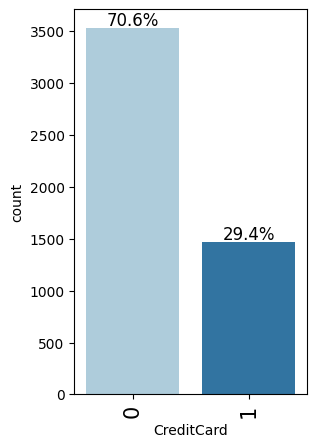

In [24]:
#* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

labeled_barplot(df, "CreditCard", perc=True)

- The visualisation shows that70% of the customer do not use credit card issued by other bank and only 29.4% uses credit bank from other bank

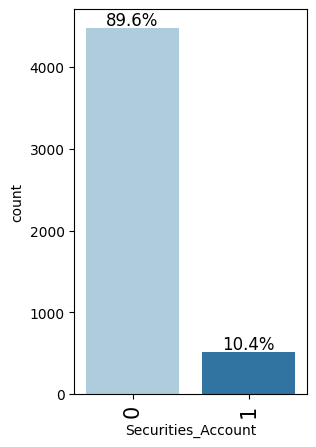

In [25]:
#Securities_Account: Does the customer have securities account with the bank?

labeled_barplot(df, "Securities_Account", perc=True)

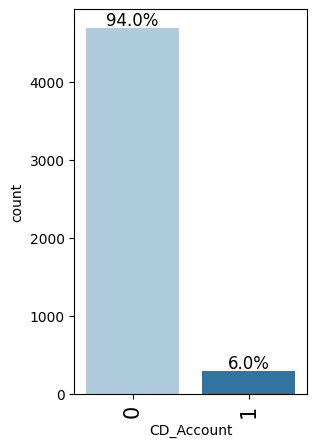

In [26]:
#* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
labeled_barplot(df, "CD_Account", perc=True)

## Bivariate Analysis 

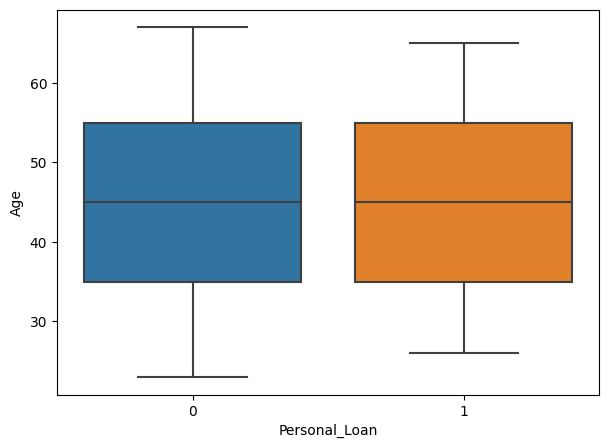

In [27]:
plt.figure(figsize=(7, 5))
sns.boxplot(data = df,y = 'Age', x= 'Personal_Loan')
plt.show()

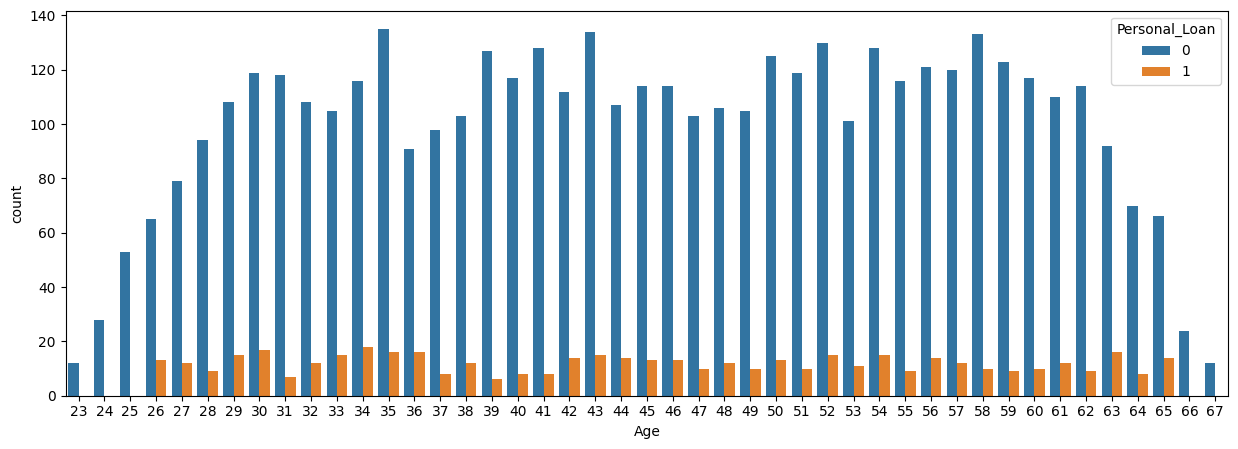

In [28]:
plt.figure(figsize=(15, 5))
sns.countplot(data = df,x = 'Age', hue='Personal_Loan')
plt.show()

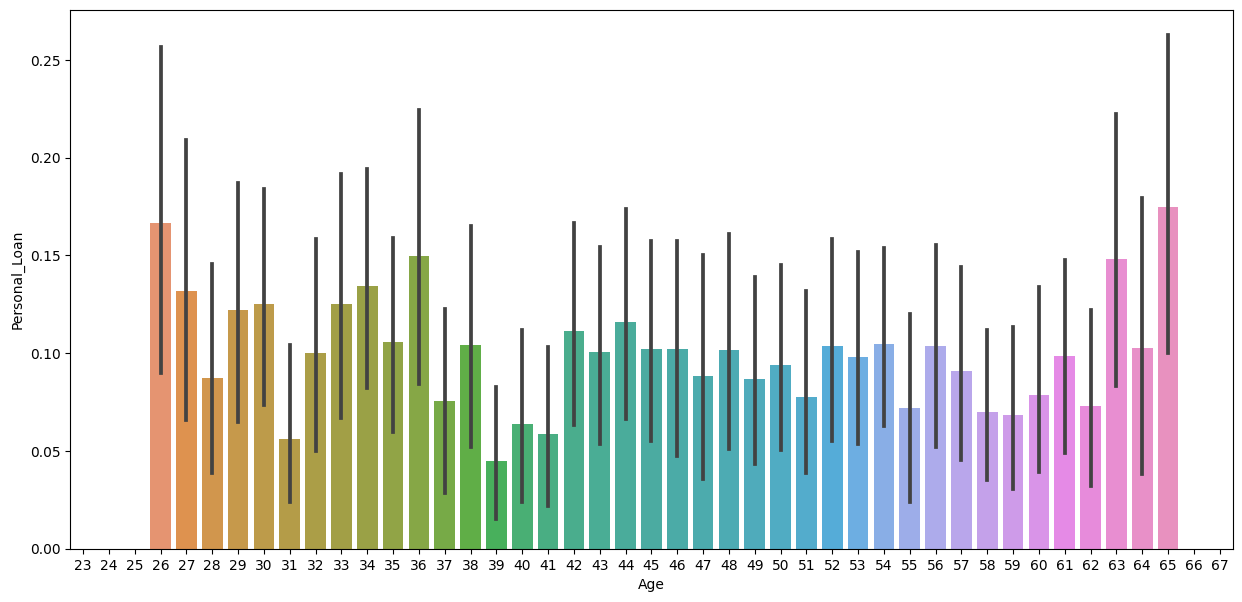

In [29]:
plt.figure(figsize=(15, 7))
sns.barplot(y="Personal_Loan", x="Age", data=df)
plt.show()

- from the above bivariate analysis of age with personal loan, it is observed that customers whose age is 23 to 25 years do not have personalloan
- Also customers age 66, 67 above equally do not have personal loan.
- So the age category of customer with peronal loan according to the data is between the age of 26 Years to 65 years 

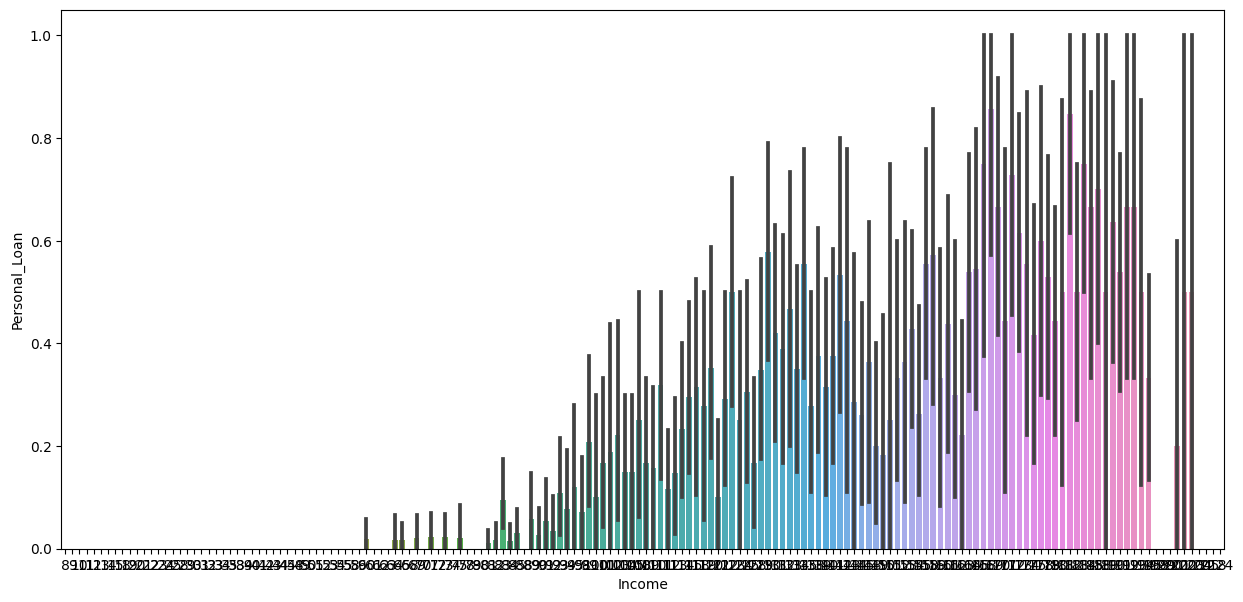

In [30]:
plt.figure(figsize=(15, 7))
sns.barplot(y="Personal_Loan", x="Income", data=df)
plt.show()

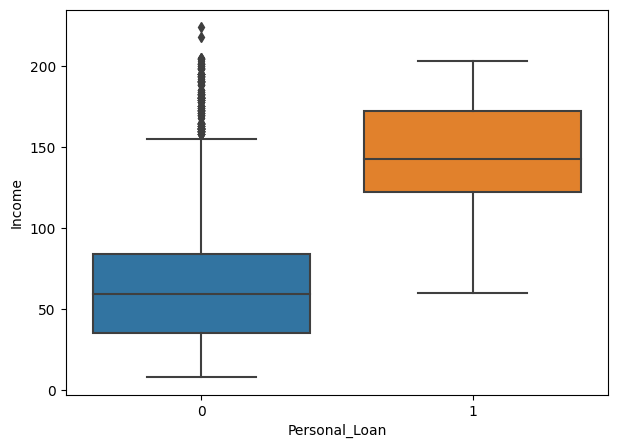

In [31]:
plt.figure(figsize=(7, 5))
sns.boxplot(data = df,y = 'Income', x='Personal_Loan')
plt.show()

- Above visualisation of income compared to personal loan shows that customers whose income ranges from 30,000 to 80,000 do not have personal loan
- few customers whose salary are from 150,000 to 200,000 also do not have personal loan with the bank
- And those that have personal loan with the bank have their income between 120,000 to 180,000

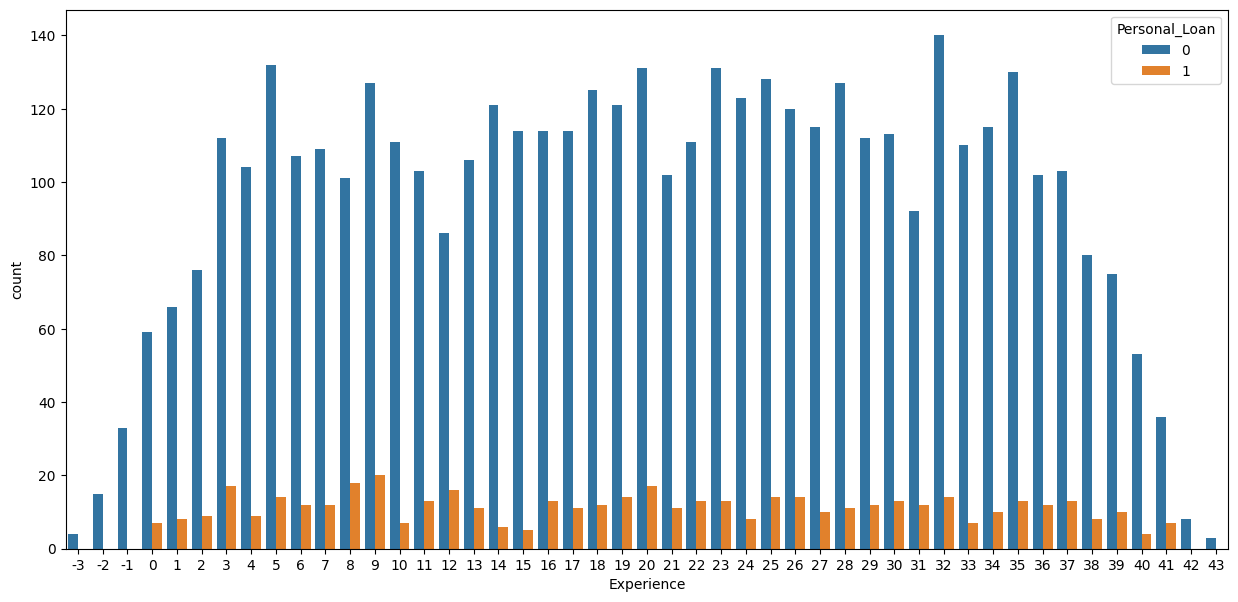

In [32]:
plt.figure(figsize=(15, 7))
sns.countplot(hue="Personal_Loan", x="Experience", data=df)
plt.show()

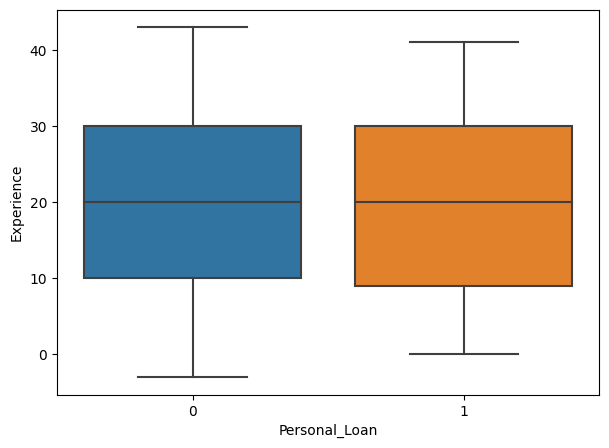

In [33]:
plt.figure(figsize=(7, 5))
sns.boxplot(data = df,y= 'Experience', x='Personal_Loan')
plt.show()

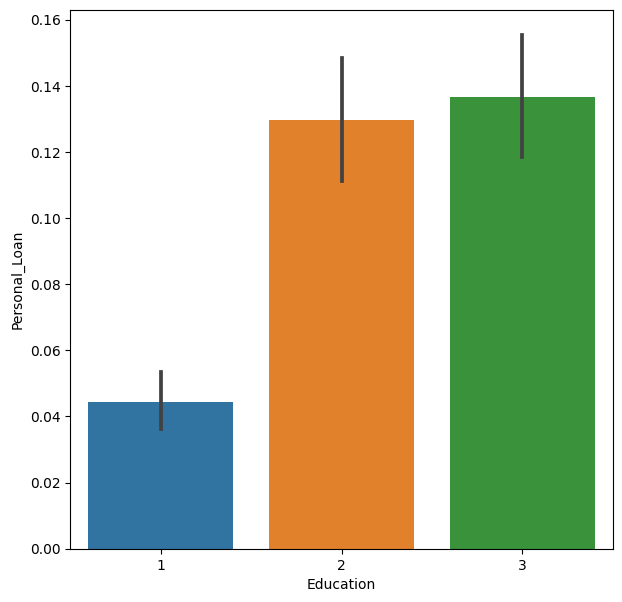

In [34]:
plt.figure(figsize=(7, 7))
sns.barplot(y="Personal_Loan", x="Education", data=df)
plt.show()

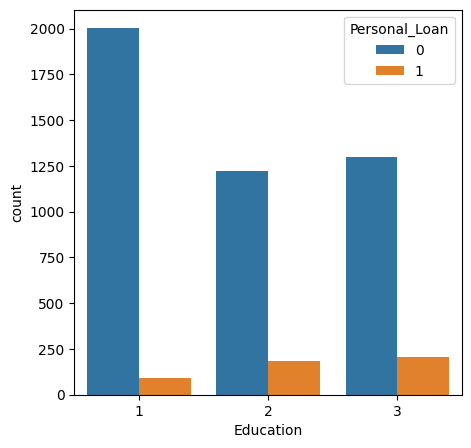

In [35]:
plt.figure(figsize=(5, 5))
sns.countplot(data = df,x = 'Education', hue='Personal_Loan')
plt.show()

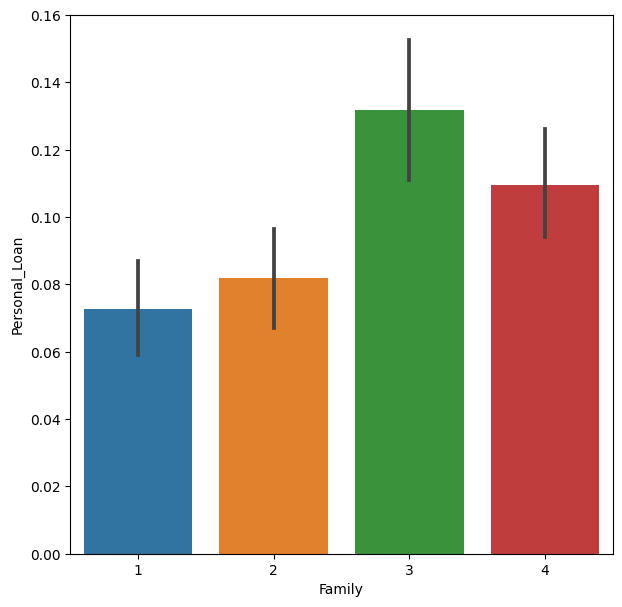

In [36]:
plt.figure(figsize=(7, 7))
sns.barplot(y="Personal_Loan", x="Family", data=df)
plt.show()

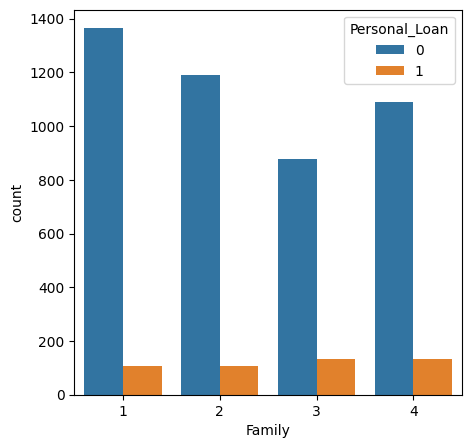

In [37]:
plt.figure(figsize=(5, 5))
sns.countplot(data = df,x= 'Family', hue='Personal_Loan')
plt.show()

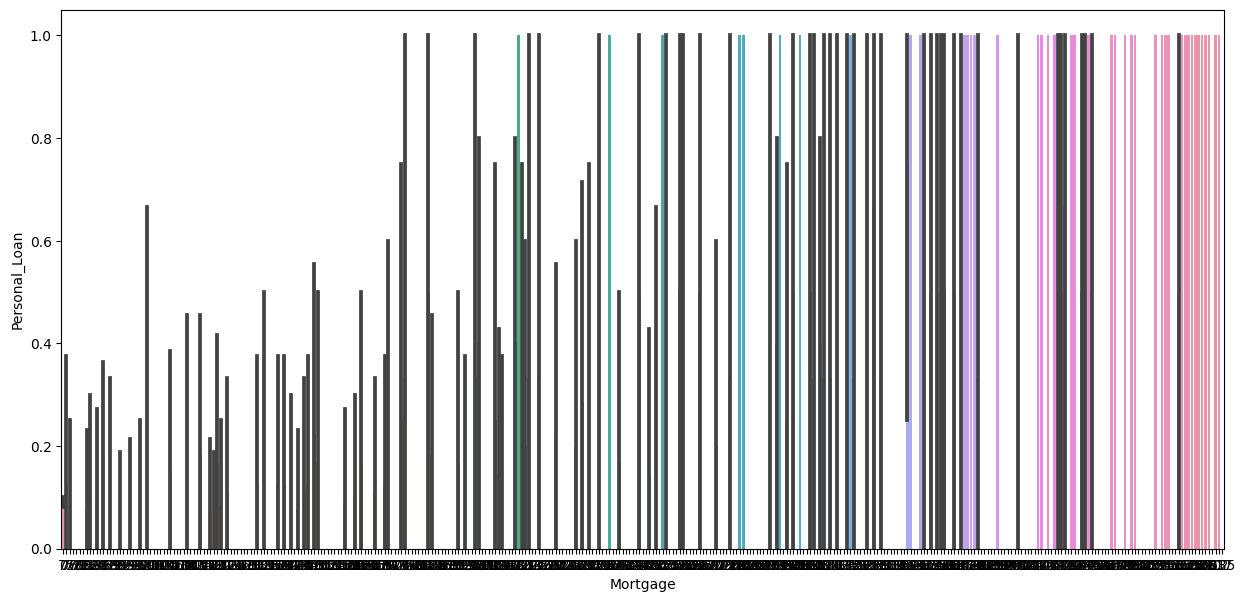

In [40]:
plt.figure(figsize=(15, 7))
sns.barplot(y="Personal_Loan", x="Mortgage", data=df)
plt.show()

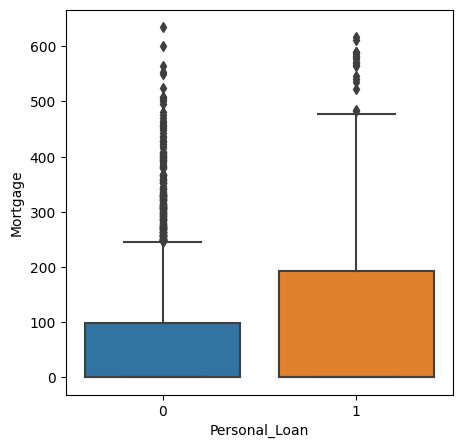

In [41]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = df,y = 'Mortgage', x='Personal_Loan')
plt.show()

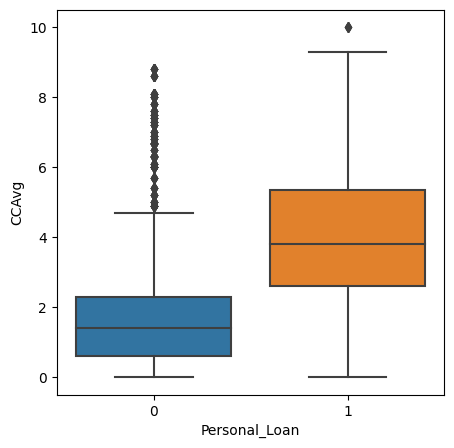

In [42]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = df,y = 'CCAvg', x='Personal_Loan')
plt.show()

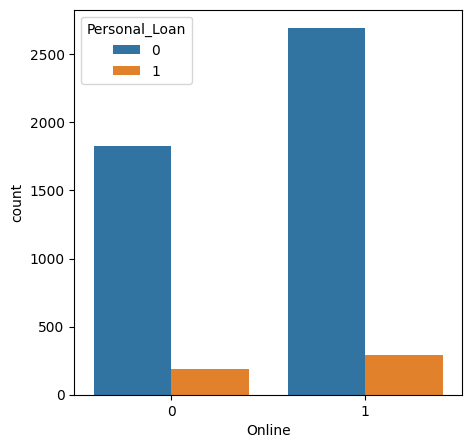

In [43]:
plt.figure(figsize=(5, 5))
sns.countplot(data = df,x = 'Online', hue='Personal_Loan')
plt.show()

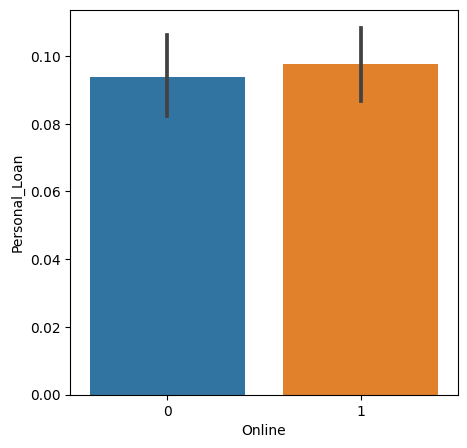

In [44]:
plt.figure(figsize=(5, 5))
sns.barplot(data = df,x = 'Online', y='Personal_Loan')
plt.show()

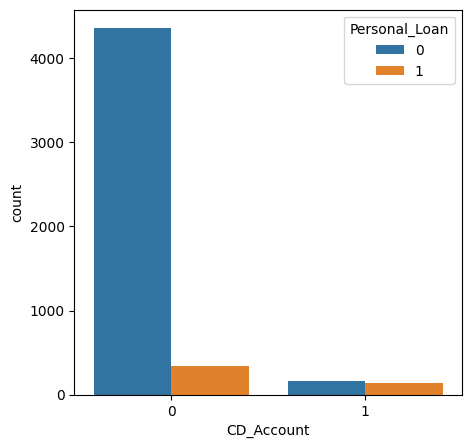

In [45]:
plt.figure(figsize=(5, 5))
sns.countplot(data = df,x = 'CD_Account', hue='Personal_Loan')
plt.show()

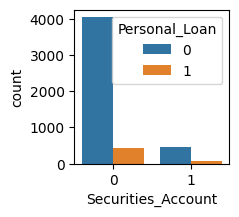

In [46]:
plt.figure(figsize=(2, 2))
sns.countplot(data = df,x = 'Securities_Account', hue='Personal_Loan')
plt.show()

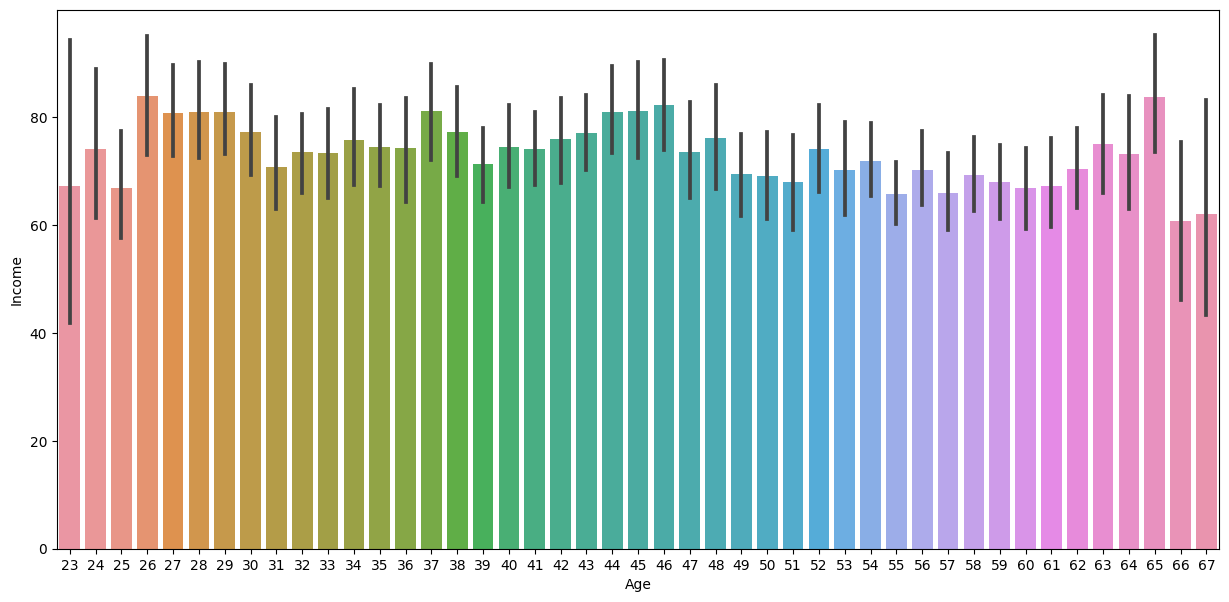

In [47]:
plt.figure(figsize=(15, 7))
sns.barplot(data = df,y = 'Income', x= 'Age')
plt.show()

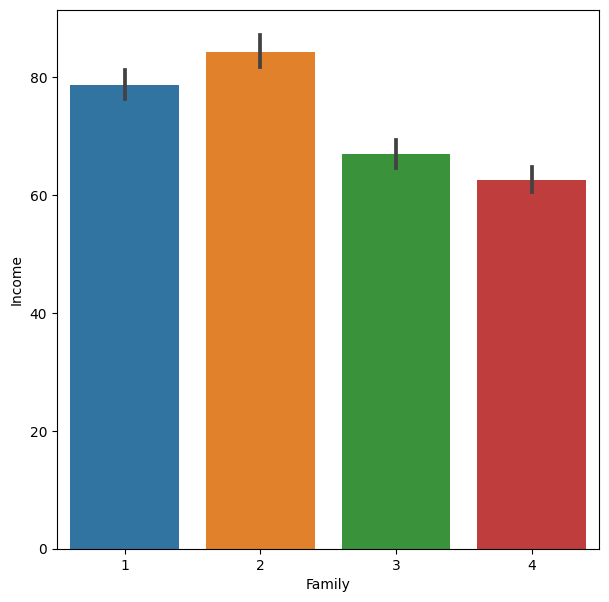

In [48]:
plt.figure(figsize=(7, 7))
sns.barplot(data = df,y = 'Income', x= 'Family')
plt.show()

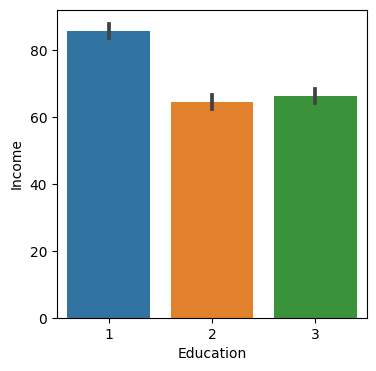

In [49]:
plt.figure(figsize=(4, 4))
sns.barplot(data = df,y = 'Income', x= 'Education')
plt.show()

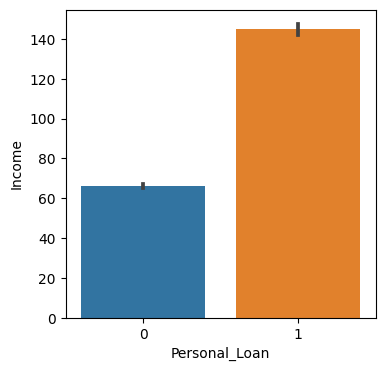

In [50]:
plt.figure(figsize=(4, 4))
sns.barplot(data = df,y = 'Income', x= 'Personal_Loan')
plt.show()

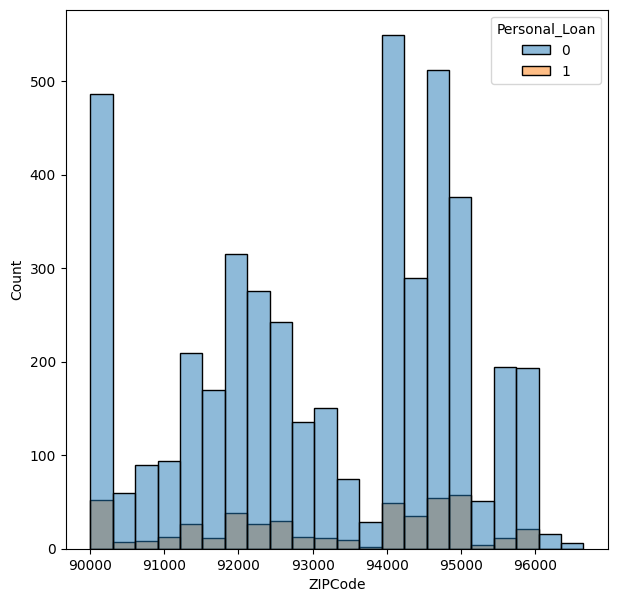

In [51]:
plt.figure(figsize=(7, 7))
sns.histplot(data = df,x = 'ZIPCode', hue= 'Personal_Loan')
plt.show()

## Ploting the Correlatio Matrix

In [52]:
mat_cor = df.corr()
mat_cor

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


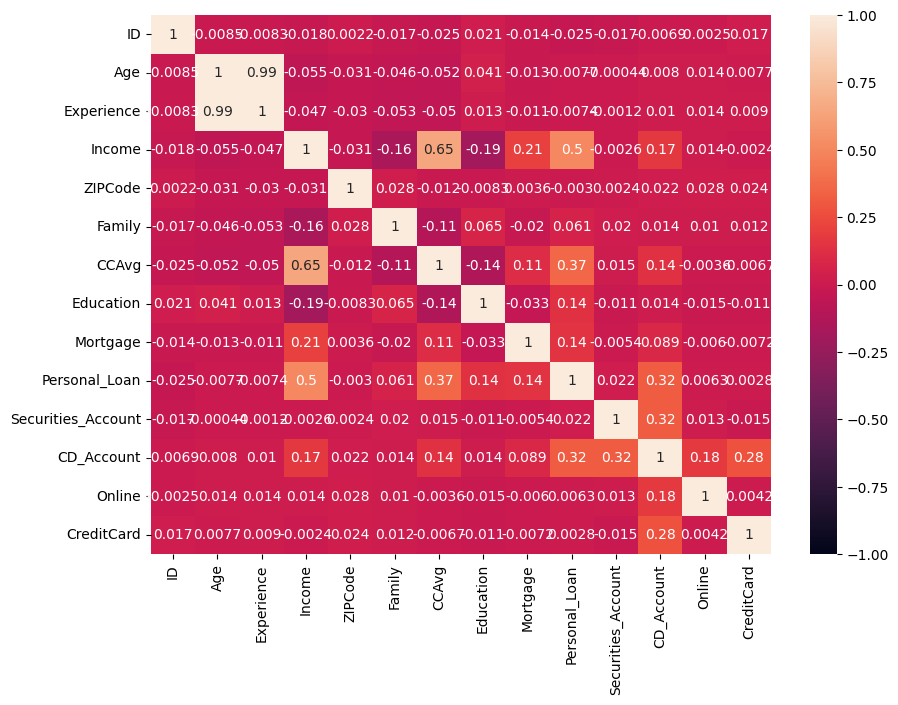

In [53]:
plt.figure(figsize=(10, 7))
sns.heatmap(mat_cor, vmin =-1, vmax =1, annot = True)
plt.show()

- from the above correlation matrix, iD has no much impact on the personal loan
-Income has a correlation of 0.5 with Personal Loan. meaning income is a key factor to be considered.
- CCAvg, Education, Mortgage and CD_Account equally have good correlation with the target variable(Personal_Loan)
-ZipCode does not really have much impact so i will be dropping Zipcode
- Income has a good correlation with CCVag

## Data Preprocessing 

In [54]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [55]:
df.duplicated().sum()

0

In [56]:
df.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- The dataset have no duplicates and there exist no non values so i will go ahead with splitting the dataset into x and y

## Spliting the data

In [57]:
x = df.drop(['ID', 'ZIPCode', 'Personal_Loan'], axis = 1)
y = df['Personal_Loan']

In [58]:
x.shape

(5000, 11)

In [59]:
y.shape

(5000,)

## Defining the models

In [60]:
log_reg = LogisticRegression(random_state = 0)
DT= DecisionTreeClassifier(random_state =0)
RF= RandomForestClassifier(random_state =0)
GB = GradientBoostingClassifier(random_state =0)

- Prior to training, i want to check using Cross_Val_Score what the accuracy of the models will be using the default model parameters

In [61]:
log_cross_score = cross_val_score(log_reg, x,y, cv=5, scoring = 'recall', n_jobs =-1)

log_cross_score

array([0.61458333, 0.625     , 0.59375   , 0.5625    , 0.63541667])

In [62]:
np.mean(log_cross_score)

0.60625

In [63]:
dt_cross_score = cross_val_score(DT, x,y, cv =5, scoring = 'recall', n_jobs = -1)
dt_cross_score
np.mean(dt_cross_score)

0.8979166666666668

In [64]:
rf_cross_score = cross_val_score(RF, x,y,cv =5, scoring = 'recall', n_jobs = -1)
rf_cross_score
np.mean(rf_cross_score)

0.8791666666666667

In [65]:
gb_cross_score = cross_val_score(GB, x,y, cv=5, scoring = 'recall', n_jobs=-1)
gb_cross_score
np.mean(gb_cross_score)

0.9

- From the above cross-val_score sampling all the model using theur respective default parameter, i observed the follwoing
- Logistic Regression have an average recall of 60%
- Decision tree have an average recall of 89%
- Random Forest have an average of 88% while
-Gradient Boosting Classifier have an average of 90% in its recall.

-I willnow begin with the proper spliiting into train test and work on each Model diffrently

## Spilting the Data into train test split

In [66]:
df['Personal_Loan'].value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- Above target dataset shows that the target variable is imbalance as 90% of the records says customers dont have Personal_Loan while only about 9.6% shows taht they have personal_Loan.

- The objective of this model is to identify the potential customers who have a higher probability of purchasing the loan.

- I will be using threshold of 50% meaning check the probability that 50% customer will purchace personal loan with the bank

## Logistic Regression Model of the Dataset

In [67]:
# split the dataset into training, validation and test data set

x_train_val, x_test, y_train_val, y_test = train_test_split(x,y,test_size = 0.2,
                                                   random_state =0,
                                                   stratify =y)


x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size =0.2,
                                                random_state =0,
                                                stratify =y_train_val)

In [68]:
# scale the training data
scale = StandardScaler()
x_train_sc =scale.fit_transform(x_train)
x_val_sc = scale.transform(x_val)

In [69]:
x_train_sc.shape

(3200, 11)

In [70]:
y_val.shape

(800,)

- There exist 800 records for validation

## Defining the training and Evaluation Pipelone

In [71]:
def train(model,X,y):
    """
    Function to train the model and compute accuracy
    
    model: Model algorithm not yet trained
    X: train features
    y: train target
    """
    
    trained_model = model.fit(X,y)
    preds =trained_model.predict(X)
    acc = accuracy_score(y,preds)
    print(f"Train accuracy: {acc}")
    return trained_model

- Note, i choose to set the threshold on which to base my evaluation probalility on to be 50%

In [72]:
def evaluate(model, X,y, threshold =0.5):
    """
    Function to evaluate the trained model with diffrent metrics
    
    model: trained_model(Classifier)
    X:Validation features
    y: targets in validation data
    threshold: value to filter the prediction
    """
    
    pred_proba = model.predict_proba(X)[:,1]
    pred_class = np.round(pred_proba > threshold) # convert to 0 or 1
    acc = accuracy_score(y, pred_class)
    recall = recall_score(y,pred_class)
    precision = precision_score(y,pred_class)
    f1 = f1_score(y, pred_class)
    
    df = pd.DataFrame({
        "Accuracy": acc,
        "Precision": precision,
        "Recall" : recall,
        "F1": f1
    }, index = [0])
    
    conf = confusion_matrix(y,pred_class, labels = [0,1])
    disp = ConfusionMatrixDisplay(conf, display_labels =[0,1])
    disp.plot()
    plt.show()
    
    return df

In [73]:
# Running and fitting my model on the scaled dataset

log_reg_model = train(log_reg, x_train_sc, y_train)

Train accuracy: 0.953125


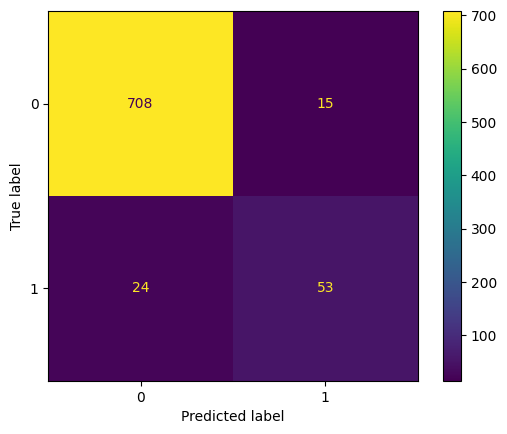

,Accuracy,Precision,Recall,F1
0,0.95125,0.779412,0.688312,0.731034


In [74]:
log_reg_result = evaluate(log_reg_model, x_val_sc, y_val)

log_reg_result

- From the above metric visualisation, the accuracy obtained when the model was trained is 95%
- Precision which shows the number of people that will buy personal Loan out of the number predicted shows that 77% is the actual number of people with Personal Loan from the number predicted
- Recall shows that only 68% of the original data said to have personal loan truly have personal loan. meaning out of 77 customers said to have personal loan, only 53 trully hav personal loan
- The True Positive from the confusion matrix prediction is 53 out of 68, meaning of the 68 predicted to have personal loan, only 53 actually have personal loan
-so the false positve is 15
- And of the 77 customers that the model said have personal loan, only 53 have personal loan

-I will try to improve the Model Recall using 2 methods so it can increase the number of customers that will have personal loan given 50% probability
- 1 from the metric side and the 2nd method would be from the data side

## Improving the Logistric regression model from the data side

- From the data side,i will be using SMOTE and Adasyn to Improve my model performance
- SMOTE because it will help in balancing the imbalanced target variable for me to use for the model
-Adasyn, because of its adaptive nature and its ability to sample more negative data

In [75]:
def balance_data( X,y,smote_type):
    """
    X: Train Features,
    y: train target,
    smote_type: type of imbalance strategy to be used
    
    """
    
    
    x_res,y_res = smote_type.fit_resample(X,y)
    return x_res,y_res

In [76]:
smote= SMOTE(random_state=0)
adasyn = ADASYN(random_state =0)

x_train_sm, y_train_sm= balance_data(x_train_sc, y_train,smote)
x_train_ad, y_train_ad= balance_data(x_train_sc, y_train,adasyn)


In [77]:
from collections import Counter
# know the number of samples for the y val data
Counter(y_val)

Counter({0: 723, 1: 77})

Train accuracy: 0.9070169374351884


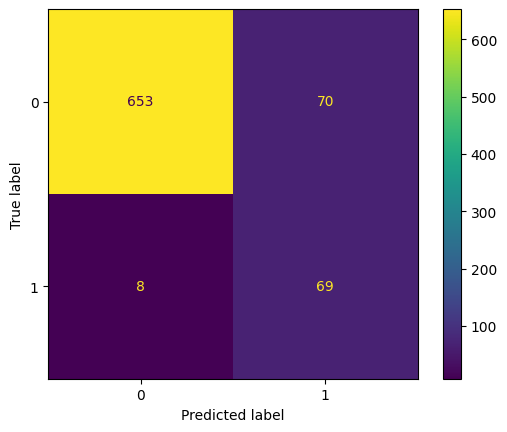

,Accuracy,Precision,Recall,F1
0,0.9025,0.496403,0.896104,0.638889


In [78]:
log_reg_sm=train(log_reg, x_train_sm, y_train_sm)
df_sm = evaluate(log_reg_sm,  x_val_sc,y_val)

df_sm

Train accuracy: 0.8838245373543523


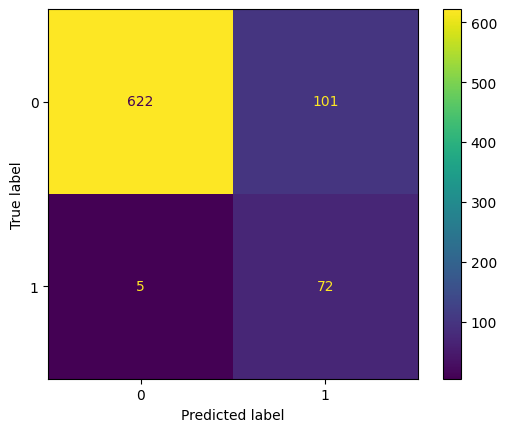

,Accuracy,Precision,Recall,F1
0,0.8675,0.416185,0.935065,0.576


In [79]:
log_reg_ad=train(log_reg, x_train_ad, y_train_ad)
df_ad = evaluate(log_reg_ad,  x_val_sc,y_val)

df_ad

- From the above, my recall improved using both SMOTE and Adasyn. Adasyn gave 93% recall meaning out of the 77 data , 72 will have personal loan
- But my concern is in precsion which give the predicted figure,

## Improving the Logistric regression model from the metric side using threshold

In [80]:
preds = log_reg_model.predict_proba(x_val_sc)[:,1]
auc = roc_auc_score(y_val,preds)
auc

0.960230640728566

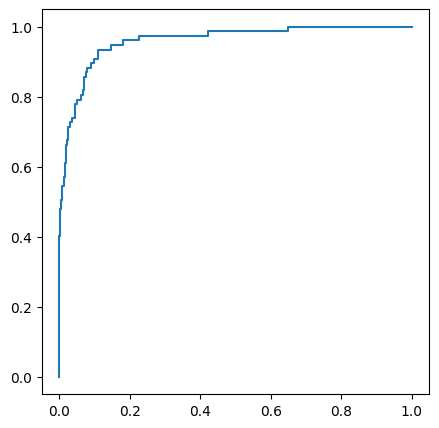

In [81]:
fpr, tpr, thrshold = roc_curve(y_val, preds)

plt.figure(figsize =(5,5))
plt.plot(fpr,tpr, label =f" Logistic Regression {auc:.2f}")

In [82]:
optimal_idx = np.argmax(tpr -fpr)
optimal_thre = thrshold[optimal_idx]

optimal_thre

0.5610449976096048

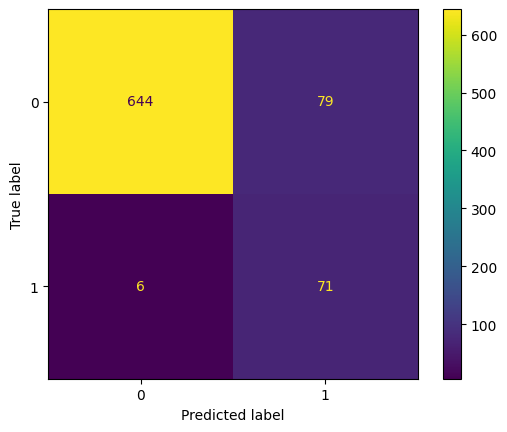

,Accuracy,Precision,Recall,F1
0,0.89375,0.473333,0.922078,0.625551


In [83]:
# Using the new threshold that gives optimal difference btw the tpr and fpr to calculate the new model metrics
evaluate(log_reg_model, x_val_sc, y_val, threshold = optimal_thre)

- Improving the model from the metric side equally increase the number of recall to 92 % meaning of the 77 originally said to have personal Loan, 71 is the acusl number that have personal loan.

## Model with Decision Tree

- For Decision Tree, i will not be scaling the data as Decision Tree is not calculating the distance between the features

- The key variables that have strong relationship with the target variable which is PersonalLoan are income, CVAvg, Mortgage, Education and CD_Account

In [84]:
# Running and fitting my model on the scaled dataset

DT_model = train(DT, x_train, y_train)

Train accuracy: 1.0


- With the training accuracy of 100%, it show that the model overfit

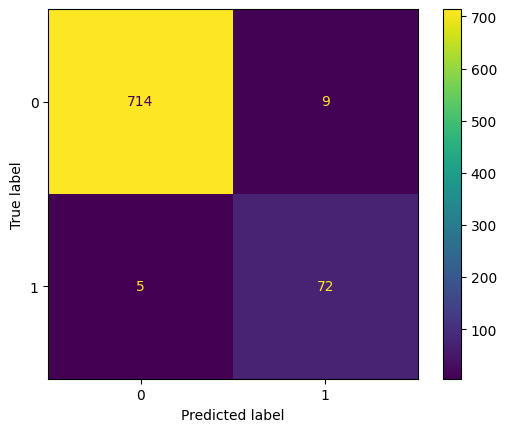

,Accuracy,Precision,Recall,F1
0,0.9825,0.888889,0.935065,0.911392


In [86]:
DT_result = evaluate(DT_model, x_val, y_val)

DT_result

- Decision tree model gave an accuracy of 98% and a precison of 88% with recall having 93%
-I will try to see if the model can be improved upon by working on the parameters such as class-weight and also preprunning

In [87]:
# Tune parameters such as max_depth and change the class_weight with more emphasis on the 1 target

DT_improved = DecisionTreeClassifier(random_state =0, class_weight = {0:0.1,1:0.9},
                                    max_depth =5)



DT_1 = train(DT_improved, x_train,y_train)

Train accuracy: 0.9603125


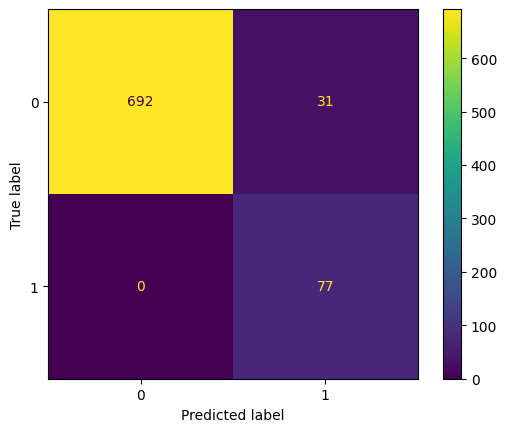

,Accuracy,Precision,Recall,F1
0,0.96125,0.712963,1.0,0.832432


In [99]:
DT1_df = evaluate(DT_1, x_val, y_val)

DT1_df

- With the improvement done, we will observe that the decision tree model accuracy is 96%
- With the improve in recall, which shows that out of the 77 the model said will have personal Loan, the entire 77 customers have personal Loan
- And we will equally observe that since the class weigh changed in the new model, we have more values predicted now.
- Of the new prediction, 108 customers predicted to have personal loan, only 77 customer will actually have personal loans

## Improve Decision Tree model from the metric side 

In [89]:
preds_dt = DT_model.predict_proba(x_val)[:,1]
auc_dt = roc_auc_score(y_val,preds_dt)
auc_dt

0.961308401142426

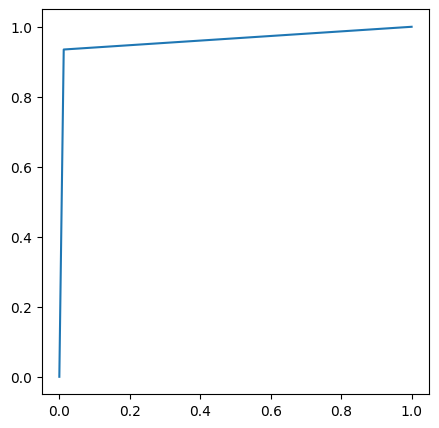

In [90]:
fpr, tpr, thrshold = roc_curve(y_val, preds_dt)

plt.figure(figsize =(5,5))
plt.plot(fpr,tpr, label =f" Decision Tree {auc_dt:.2f}")

In [91]:
dt_optimal_idx = np.argmax(tpr -fpr)
dt_optimal_thre = thrshold[dt_optimal_idx]

dt_optimal_thre

1.0

- From the above, the optimal threshhold being calculated by the model is 1.0 meaning 100%

C:\Users\Elitebook g3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


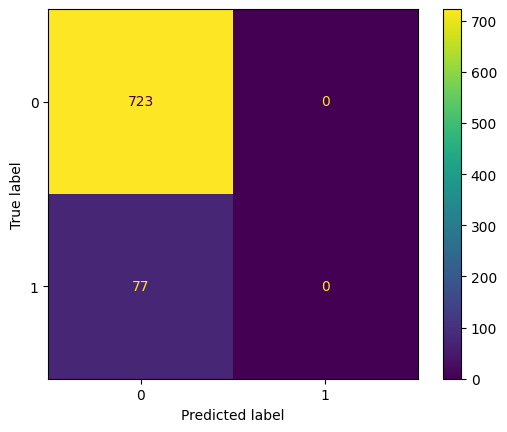

,Accuracy,Precision,Recall,F1
0,0.90375,0.0,0.0,0.0


In [92]:
# Using the new threshold that gives optimal difference btw the tpr and fpr to calculate the new model metrics
evaluate(DT_model, x_val, y_val, threshold = dt_optimal_thre)

## Model with Random Forest

In [93]:
RF = RandomForestClassifier(random_state = 0)

In [94]:
RF_model = train(RF, x_train_sc, y_train)

Train accuracy: 1.0


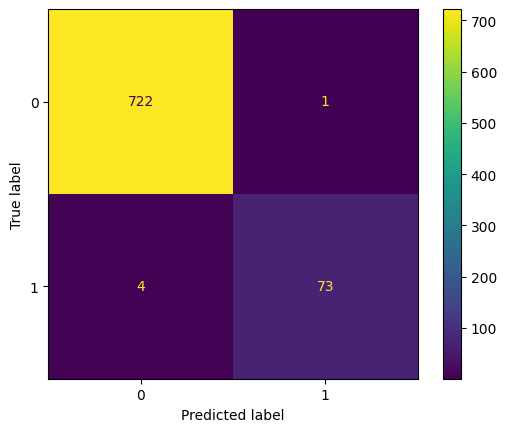

,Accuracy,Precision,Recall,F1
0,0.99375,0.986486,0.948052,0.966887


In [95]:
RF_result = evaluate(RF_model, x_val_sc, y_val)

RF_result

- With the Random Forest model, the model show that of the predicted 74 customers that will have personal loan, 73 is tha actual number of customer with Personal Loan
- And with the recall, i have a 94% true that out of the customer that have personal Loan, 94% most time, the model is always true,


In [ ]:
## Hyperparameter tunning with Gridsearch and RandomisedSearchcv

## Model with Gradient Boosting

In [96]:
GB = GradientBoostingClassifier(random_state = 0)

In [97]:
GB_model = train(GB, x_train_sc, y_train)

Train accuracy: 0.9953125


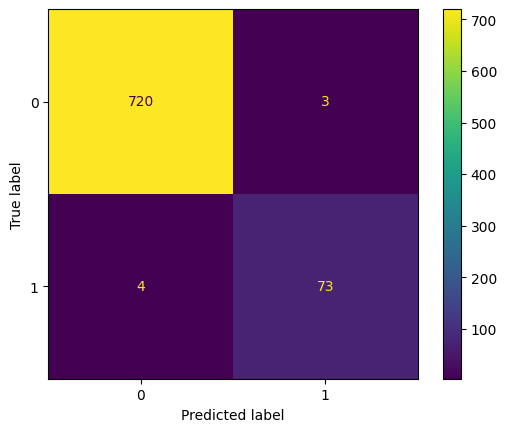

,Accuracy,Precision,Recall,F1
0,0.99125,0.960526,0.948052,0.954248


In [98]:
GB_result = evaluate(GB_model, x_val_sc, y_val)

GB_result

## Actionable Insights & Recommendations

- It is observed that the recall produced when the default parameters of Logistic regression was used had 66% but after modeloptimization, the recall increased to 93%
- For Decision Tree modelwith the default parameters had a higher value in the recall and when the tree were pre-prunned with a change in the class weight, the recall value improved to 100&
- The key conclusion is that Customers income is a major factor in determining if a customer will have personal Loan or not
- Also the Average spending on credit cards per month is another factor which determine if a customer will have personal loan or not
- The marketing department should target customers with high income and whose average spending on the credit card is high based on the information within the data set
- They should pull out the list of customers that fall within these category and target their campaign to attract these category of customers.